Statement :- Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. 
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.
## Steps -
1. Import the necessary packages (numpy, pandas, matplotlib)
2. Split the data into features and identify the dependent(y) and independent variables(x).
3. Calculate the error values. Optimize the error using Gradient descent.
4. Plot the regression line.


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
# making data a pandas data frame, uploap the data in the csv file.
data = pd.read_csv('data/ex1data1.txt',header=None) # Since there are no headers.
x_population = data[0].values  # Extracting the first column and storing in a pandas series.
y_profits = data[1].values # Same for the second column

# x_population = x_population[:,np.newaxis]
# y_profits = y_profits[:,np.newaxis]
m = len(y_profits)
alpha = 0.01
iterations = 1000

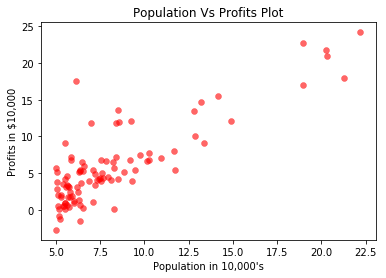

In [146]:
plt.scatter(x_population,y_profits,c='red',linewidths=0.4,alpha=0.6,)
plt.title('Population Vs Profits Plot')
plt.xlabel('Population in 10,000\'s')
plt.ylabel('Profits in $10,000')
plt.show()

In [147]:
def compute_cost(m,b,x_population,y_profits):
    '''
    The function will return the cost for a given line given its parameters.
    Arguments: 
    m - starting slope of the line
    b - starting intercept of the line
    x_population - values of population
    y_profits - values of profits
    Return : The total average cost or error for a line
    '''
    
    total_error = 0
    for i in range(0,len(x_population)):
        x = x_population[i]
        y = y_profits[i]
        total_error += ((m * x + b) - y)**2
    return (total_error/(2*len(x_population)))
    
cost = compute_cost(0,0,x_population,y_profits)
print(cost)

32.072733877455654


In [151]:
def step_gradient(m_current,b_current,alpha,x_population,y_profits):
    '''
    The function will calculate the new parameters based on the gradient and learning rates given to it.
    Arguments :
    m_current - Current Slope
    b_current - current Intercept  
    Return : The new parameters.
    '''
    m = len(x_population)
    b_partial = m_partial = 0  # partial derivatives for all the data
    for i in range(0,m):
        x = x_population[i]
        y = y_profits[i]
        
        b_partial += ((m_current*x + b_current) - y)
        m_partial += ((m_current*x + b_current) - y) * x
        
    new_b = b_current - (alpha * b_partial)/m
    new_m = m_current - (alpha * m_partial)/m
    return new_b,new_m

In [149]:
def gradient_descent_runner(start_m,start_b,iterations,x_population,y_profits,alpha):
    b = start_b
    m = start_m
    for i in range(0,iterations):
        b, m = step_gradient(m,b,alpha,x_population,y_profits)
    return b,m

b,m = gradient_descent_runner(0,0,iterations,x_population,y_profits,alpha)
print('Final intercept :-> {0}, Final Slope :-> {1}'.format(b,m))
cost1 = compute_cost(m,b,x_population,y_profits)
print('Final Cost :-> {0}'.format(cost1))

Final intercept :-> -3.241402144274422, Final Slope :-> 1.1272942024281842
Final Cost :-> 4.515955503078914


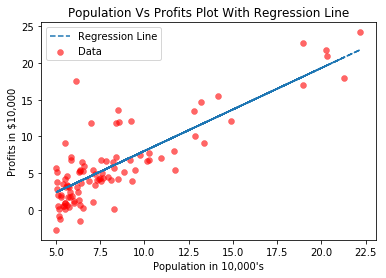

In [150]:
plt.scatter(x_population,y_profits,c='red',linewidths=0.4,alpha=0.6,label='Data')
plt.plot(x_population,(m*x_population+b),label='Regression Line',linestyle='dashed')
plt.title('Population Vs Profits Plot With Regression Line')
plt.legend()
plt.xlabel('Population in 10,000\'s')
plt.ylabel('Profits in $10,000')
plt.show()